# Introducción a Scipy

Scipy es una biblioteca que forma parte del conjunto numpy y se compone de herramientas y algoritmos matemáticos. SciPy contiene módulos para optimización, álgebra lineal, integración, interpolación, funciones especiales, cálculo de la transformada de Fourier, procesamiento de señales y de imagen, resolución de ecuaciones diferenciales y otras tareas para la ciencia e ingeniería.

## Importar Scipy

Normalmente accederemos a scipy con el típico "import scipy" , pero también podemos acceder directamente al submódulo que deseamos o a una función concreta. Se suele utilizar scipy para cálculos muy puntuales por lo que lo que más se hace es importar directamente la función.

## Submódulo Stats

El submódulo stats de scipy contiene funciones relacionadas con la estadística y las distribuciones de probabilidad.

Vamos a jugar un poco con la distribución normal, para lo que tenemos que conocer dos conceptos principales
1. La función de densidad de probabilidad (pdf)
    - Es una teoría para definir cómo se distribuye una variable numérica en una población
    - Es una línea continua que representa la distribución de densidad de toda la población. El área bajo la curva es la probabilidad.

2. La función de distribución acumulada (cdf)
    - Sirve para calcular la probabilidad acumulada de un valor dado de X.
            cdf(X) =  x ≤ X

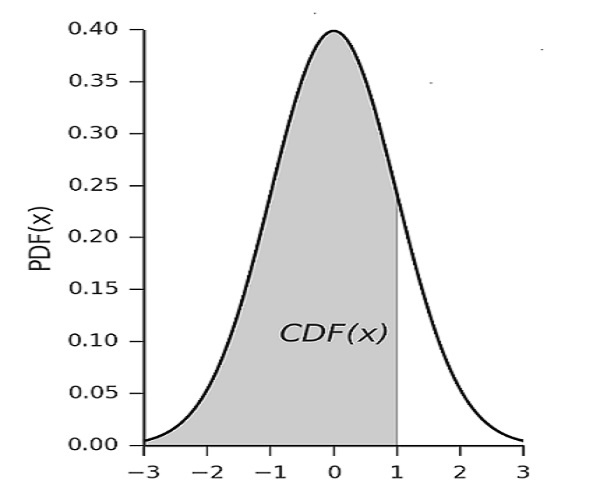

*En este ejemplo, queremos calcular la función de distribución acumulada y encontrar la probabilidad de **x > 0** para una distribución normal con una media de cero y una desviación estándar de uno.*

In [3]:
#importamos las bibliotecas qon las que vamos a trabajar
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#importamos directamente la funcion "norm" de scipy para general una distribución normal de mentirijilla
from scipy.stats import norm

In [4]:
normal = norm(loc = 0, scale = 1)

- Primero calculamos la probabilidad de que un valor de la distribución sea menor o igual a 0 con la función cdf

In [39]:
print ('La probabilidad de que un valor de nuestra distribución sea menor o igual a cero es de %.2f' % normal.cdf(0.75))

La probabilidad de que un valor de nuestra distribución sea menor o igual a cero es de 0.77


- Pero recordemos que queremos calcular la probabilidad de que el valor sea mayor que 0, por lo que tendremos que calcular la parte restante

In [40]:
print ('La probabilidad de que un valor de nuestra distribución sea mayor que cero es de %.2f' % (1 - normal.cdf(0.75)))

La probabilidad de que un valor de nuestra distribución sea mayor que cero es de 0.23


*En el siguiente ejemplo, dibujaremos la curva de campana. La media es cero y la desviación estándar es 1 (estos son los valores predeterminados para esta función).*

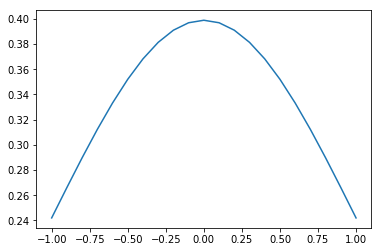

In [19]:
# La siguiente línea genera valores entre -1 y 1 con incrementos de 0.1
x = np.arange(-1, 1.1, 0.1)
# Inicializamos un objeto de distribución normal
normal = norm()
# Ploteamos la gaussiana con matplotlib definiéndola con la pdf para los valores generados en x
plt.plot(x, normal.pdf(x));

El submódulo Stats contiene muchas otras distribuciones como la [distribución binomial](http://www.matematicasvisuales.com/html/probabilidad/varaleat/binomial.html) y la [distribución de poisson](http://www.matematicasvisuales.com/html/probabilidad/varaleat/poisson.html).


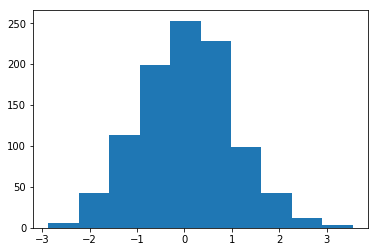

In [58]:
import numpy as np

plt.hist(np.random.randn(1000));

## Submódulo linalg

Este submódulo nos ayuda a realizar cálculos de álgebra lineal sobre nuestros datos. Usando el álgebra lineal, podemos transponer e invertir matrices. También podemos resolver sistemas ecuaciones lineales y encontrar los valores propios de una matriz.

In [37]:
from scipy import linalg

In [38]:
help(linalg)

Help on package scipy.linalg in scipy:

NAME
    scipy.linalg

DESCRIPTION
    Linear algebra (:mod:`scipy.linalg`)
    
    .. currentmodule:: scipy.linalg
    
    Linear algebra functions.
    
    .. seealso::
    
       `numpy.linalg` for more linear algebra functions.  Note that
       although `scipy.linalg` imports most of them, identically named
       functions from `scipy.linalg` may offer more or slightly differing
       functionality.
    
    
    Basics
    
    .. autosummary::
       :toctree: generated/
    
       inv - Find the inverse of a square matrix
       solve - Solve a linear system of equations
       solve_banded - Solve a banded linear system
       solveh_banded - Solve a Hermitian or symmetric banded system
       solve_circulant - Solve a circulant system
       solve_triangular - Solve a triangular matrix
       solve_toeplitz - Solve a toeplitz matrix
       det - Find the determinant of a square matrix
       norm - Matrix and vector norm
       l

Por ejemplo, en el siguiente código, resolveremos sistema de ecuaciones lineales:

*Tenemos las dos ecuaciones: '5x + 6y = 10' y '2x + 4y = 8'. Estas dos ecuaciones se pueden separar en una matriz para los coeficientes en el lado izquierdo y una para las constantes en el derecho. Pasaremos estas dos matrices a la función de resolución para encontrar los valores posibles para x e y.*

In [60]:
from scipy.linalg import solve

a = np.array([[5, 6], [5, 2]])
b = np.array([10, 8])
x = solve(a, b)
x

array([1.4, 0.5])

## Submódulo interpolate

Este submódulo contiene funciones para interpolar entre dos puntos utilizando diferentes algoritmos. La interpolación entre dos puntos puede ser particularmente útil cuando tenemos dos puntos que están demasiado alejados, y nos gustaría estimar lo que está sucediendo potencialmente entre los puntos.

Una de esas funciones es la función interp1d. Esta función utiliza múltiples algoritmos para interpolar entre dos puntos. Las dos opciones más comunes para la interpolación son la interpolación lineal y spline. 



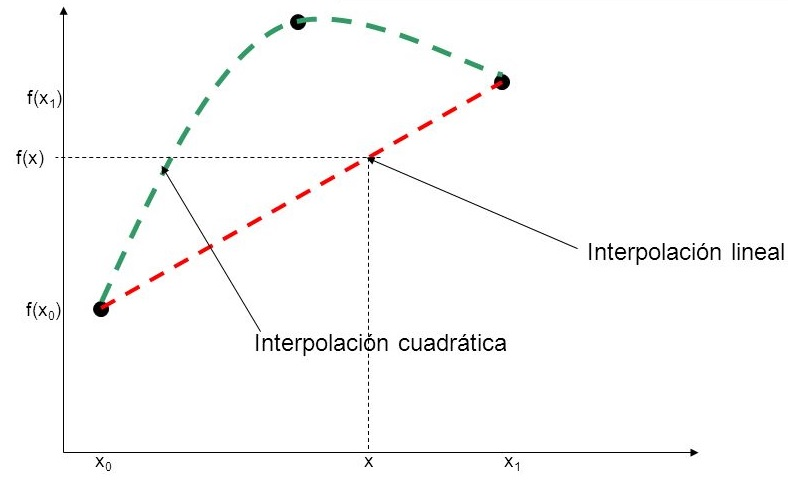

In [34]:
help(interp1d)

Help on class interp1d in module scipy.interpolate.interpolate:

class interp1d(scipy.interpolate.polyint._Interpolator1D)
 |  interp1d(x, y, kind='linear', axis=-1, copy=True, bounds_error=None, fill_value=nan, assume_sorted=False)
 |  
 |  Interpolate a 1-D function.
 |  
 |  `x` and `y` are arrays of values used to approximate some function f:
 |  ``y = f(x)``.  This class returns a function whose call method uses
 |  interpolation to find the value of new points.
 |  
 |  Note that calling `interp1d` with NaNs present in input values results in
 |  undefined behaviour.
 |  
 |  Parameters
 |  ----------
 |  x : (N,) array_like
 |      A 1-D array of real values.
 |  y : (...,N,...) array_like
 |      A N-D array of real values. The length of `y` along the interpolation
 |      axis must be equal to the length of `x`.
 |  kind : str or int, optional
 |      Specifies the kind of interpolation as a string
 |      ('linear', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic',
 |      

*Veamos un ejemplo de interpolación lineal.*

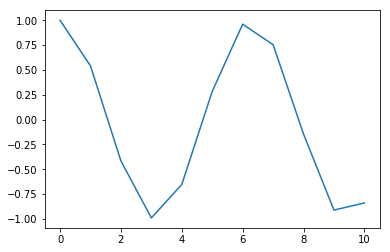

In [32]:
from scipy.interpolate import interp1d

#Creamos un data set donde los valores de x son los números de 0 a 10 y, los valores de y el coseno de los de x
# and the y values are the cosine of the x values
x = np.arange(0, 11, 1)
y = np.cos(x)

# Generamos la función de interpolación y la aplicamos a los nuevos datos. Ploteamos
f = interp1d(x, y)
xnew = np.arange(0, 10.25, 0.25)
plt.plot(xnew, f(xnew));

*Podemos hacer una interpolación cuadrática (spline) si se lo indicamos a la función.*

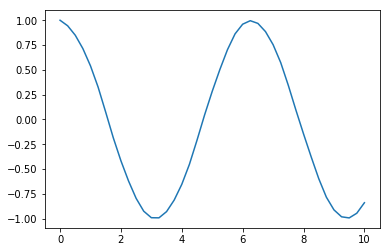

In [35]:
f = interp1d(x, y, kind = 'quadratic')
xnew = np.arange(0, 10.25, 0.25)
plt.plot(xnew, f(xnew));

### Imputación con interpolación